# Impute missing values with "ExtraTreesRegressor"

In [20]:
# Import pandas
import pandas as pd
import pytoolbox as ptb
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Upload 'bike_rentals.csv' to dataFrame
df_bikes = pd.read_csv('bike_rentals.csv')

In [3]:
df_bikes.groupby(['season']).agg(['median'])

/var/folders/pc/t6w9tgr112v1xdsjl9vggh6c0000gn/T/ipykernel_8231/3891420768.py:1: FutureWarning: ['dteday'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_bikes.groupby(['season']).agg(['median'])


,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,median,median,median,median,median,median,median,median,median,median,median,median,median,median
season,,,,,,,,,,,,,,
1.0,366.0,0.5,2.0,0.0,3.0,1.0,1.0,0.285833,0.282821,0.543750,0.202933,218.0,1867.0,2209.0
2.0,308.5,0.5,5.0,0.0,3.0,1.0,1.0,0.562083,0.538212,0.646667,0.192783,867.0,3844.0,4941.5
3.0,401.5,0.5,8.0,0.0,3.0,1.0,1.0,0.714583,0.656575,0.635833,0.165115,1050.5,4110.5,5353.5
4.0,493.0,0.5,11.0,0.0,3.0,1.0,1.0,0.410000,0.409708,0.661042,0.167304,544.5,3815.0,4634.5


In [4]:
idx = df_bikes.loc[df_bikes.isnull().any(axis=1),df_bikes.isnull().any()].index
print(idx)
df_bikes.loc[df_bikes.isnull().any(axis=1),df_bikes.isnull().any()]

Int64Index([56, 81, 128, 129, 213, 298, 388, 528, 701, 730], dtype='int64')


,yr,mnth,temp,atemp,hum,windspeed
56,0.0,2.0,0.282500,0.282192,0.537917,NaN
81,0.0,3.0,0.346957,0.337939,0.839565,NaN
128,0.0,5.0,0.532500,0.525246,0.588750,NaN
129,0.0,5.0,0.532500,0.522721,NaN,0.115671
213,0.0,8.0,0.783333,0.707071,NaN,0.205850
298,0.0,10.0,0.484167,0.472846,0.720417,NaN
388,1.0,1.0,0.342500,0.349108,NaN,0.123767
528,1.0,6.0,0.653333,0.597875,0.833333,NaN
701,1.0,12.0,NaN,NaN,0.823333,0.124379
730,NaN,NaN,0.215833,0.223487,0.577500,0.154846


In [5]:
# impute missing values

# Imputations I
for i in ['temp', 'atemp', 'hum', 'windspeed']:
    df_bikes[i].fillna(df_bikes.groupby('season')[i].transform('median'), inplace=True)

# Imputations II
df_bikes['dteday'] = pd.to_datetime(df_bikes['dteday'], infer_datetime_format=True)
df_bikes['mnth'] = df_bikes['dteday'].dt.month

# Imputations III
df_bikes.loc[730, 'yr'] = 1.0

In [6]:
df_bikes.iloc[idx]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
56,57,2011-02-26,1.0,0.0,2,0.0,6.0,0.0,1,0.282500,0.282192,0.537917,0.202933,424,1545,1969
81,82,2011-03-23,2.0,0.0,3,0.0,3.0,1.0,2,0.346957,0.337939,0.839565,0.192783,203,1918,2121
128,129,2011-05-09,2.0,0.0,5,0.0,1.0,1.0,1,0.532500,0.525246,0.588750,0.192783,664,3698,4362
129,130,2011-05-10,2.0,0.0,5,0.0,2.0,1.0,1,0.532500,0.522721,0.646667,0.115671,694,4109,4803
213,214,2011-08-02,3.0,0.0,8,0.0,2.0,1.0,1,0.783333,0.707071,0.635833,0.205850,801,4044,4845
298,299,2011-10-26,4.0,0.0,10,0.0,3.0,1.0,2,0.484167,0.472846,0.720417,0.167304,404,3490,3894
388,389,2012-01-24,1.0,1.0,1,0.0,2.0,1.0,1,0.342500,0.349108,0.543750,0.123767,439,3900,4339
528,529,2012-06-12,2.0,1.0,6,0.0,2.0,1.0,2,0.653333,0.597875,0.833333,0.192783,477,4495,4972
701,702,2012-12-02,4.0,1.0,12,0.0,0.0,0.0,2,0.410000,0.409708,0.823333,0.124379,892,3757,4649
730,731,2012-12-31,1.0,1.0,12,0.0,1.0,0.0,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [7]:
df_bikes[df_bikes.isnull().any(axis=1)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [8]:
# Drop 'casual', 'registered' columns
df_bikes = df_bikes.drop(['dteday', 'casual', 'registered'], axis=1)

In [9]:
# Split data into X and y
X = df_bikes.iloc[:,:-1]
y = df_bikes.iloc[:,-1]

In [10]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Import Linear Regression
from sklearn.linear_model import LinearRegression

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

### Impute missing values 

In [22]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer

# impute_estimator = KNeighborsRegressor(n_neighbors=5)
impute_estimator = ExtraTreesRegressor(n_estimators=10, random_state=0)
# impute_estimator = RandomForestRegressor(n_estimators=10, random_state=0)

imp_mean = IterativeImputer(random_state=0, estimator=impute_estimator)

# impute_estimator = KNNImputer(n_neighbors=5)
X_train_imputed = imp_mean.fit_transform(X_train)
X_test_imputed = imp_mean.transform(X_test)

# train/test approach
xg_reg = XGBRegressor()
xg_reg.fit(X_train_imputed, y_train)
y_pred = xg_reg.predict(X_test_imputed)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE: {0:0.2f}\n'.format(rmse))

# k-fold cross validation
model = XGBRegressor(objective="reg:squarederror")
X_imputed = df_bikes.iloc[:,:-1]
X_imputed = imp_mean.fit_transform(X_imputed)
scores = cross_val_score(model, X_imputed, y, scoring='neg_mean_squared_error', cv=10)
rmse = np.sqrt(-scores)
print('Reg rmse:', np.round(rmse, 2))
print('RMSE mean: %0.2f' % (rmse.mean()))
print('RMSE std: {0:0.2f}'.format(rmse.std()))

RMSE: 705.11

Reg rmse: [ 717.65  692.8   520.7   737.68  835.96 1006.24  991.34  747.61  891.99
 1731.13]
RMSE mean: 887.31
RMSE std: 313.46


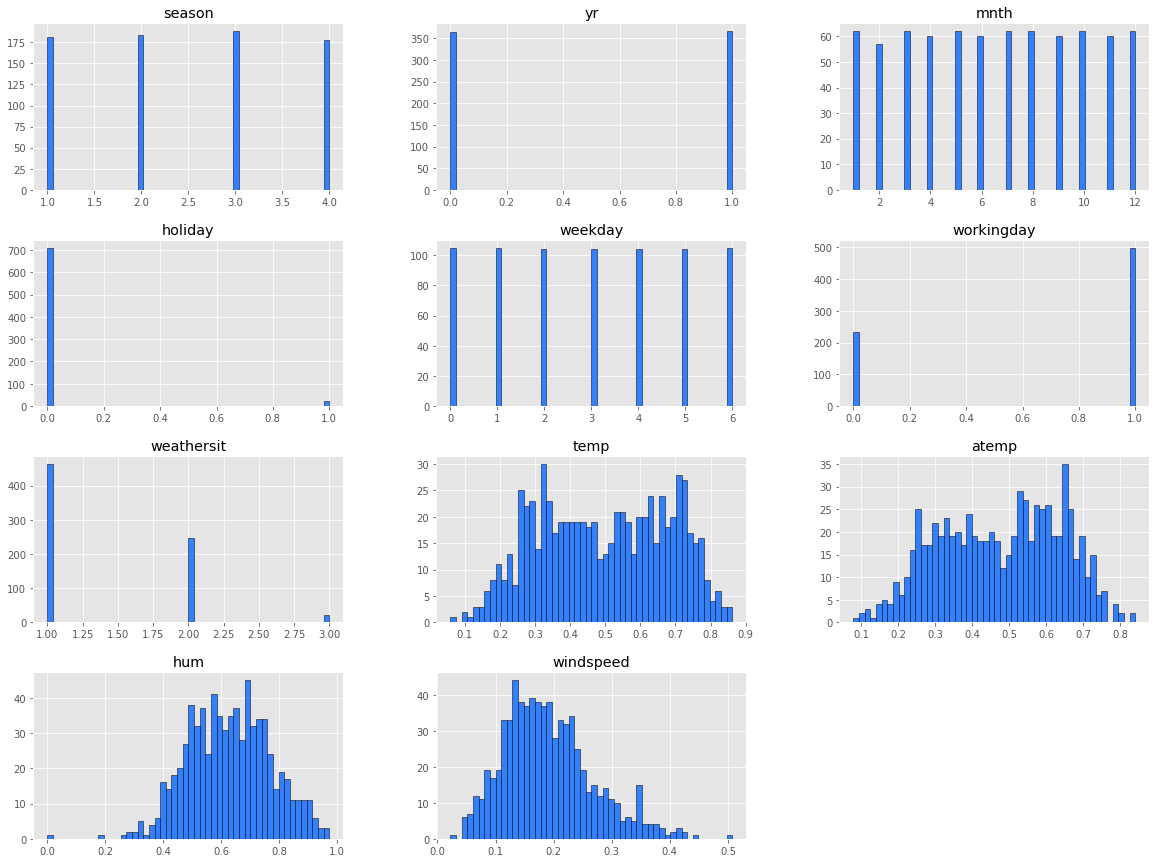

In [12]:
df_imputed = pd.read_csv('bike_rentals_cleaned.csv')
df_imputed = pd.DataFrame(X_imputed, columns=df_imputed.columns[:-1])

plt.style.use('ggplot')
df_imputed.loc[:, df_imputed.columns!='instant'].hist(bins=50, figsize=(20,15), ec='black', color='#3380FF')
plt.show()

## XGB book

In [13]:
df_bikes = pd.read_csv('bike_rentals_cleaned.csv')
X = df_bikes.iloc[:,:-1]
y = df_bikes.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [14]:
# LinearRegression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: %0.2f" % (rmse))

RMSE: 898.21


In [23]:
xg_reg = XGBRegressor()
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: %0.2f" % (rmse))

RMSE: 705.11


In [16]:
model = LinearRegression()
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)
rmse = np.sqrt(-scores)
print('Reg rmse:', np.round(rmse, 2))
print('RMSE mean: %0.2f' % (rmse.mean()))

Reg rmse: [ 504.01  840.55 1140.88  728.39  640.2   969.95 1133.45 1252.85 1084.64
 1425.33]
RMSE mean: 972.02


In [21]:
model = XGBRegressor(objective="reg:squarederror")
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)
rmse = np.sqrt(-scores)
print('Reg rmse:', np.round(rmse, 2))
print('RMSE mean: %0.2f' % (rmse.mean()))
print('RMSE std: {0:0.2f}'.format(rmse.std()))

Reg rmse: [ 717.65  692.8   520.7   737.68  835.96 1006.24  991.34  747.61  891.99
 1731.13]
RMSE mean: 887.31
RMSE std: 313.46


# Machine Learning - Classification

In [24]:
# Upload Census dataset (adult) from UCI Machine Learning Repository
df_census = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')

# Display first 5 rows
df_census.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [49]:
# Upload Census dataset with no header
df_census = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)

# Display first 5 rows
df_census.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [50]:
# Define df_census columns
df_census.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                  'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 
                   'income']

# Display first 5 rows
df_census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [51]:
# Display df_census info
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [52]:
# Drop education column
df_census = df_census.drop(['education'], axis=1)

In [59]:
df_omd = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
df_omd.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                  'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 
                   'income']
df_omd = df_omd.drop(['education'], axis=1)
df_omd.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [60]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(df_omd)

df_omd = enc.transform(df_omd)

In [62]:
df_omd

<32561x22130 sparse matrix of type '<class 'numpy.float64'>'
	with 455854 stored elements in Compressed Sparse Row format>

In [53]:
# Convert non-numeric columns using get_dummies
df_census = pd.get_dummies(df_census)

# Display first 5 rows
df_census.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [63]:
# Drop column 'income_ <=50K'
df_census = df_census.drop('income_ <=50K', axis=1)

In [64]:
# Split data into X and y
X = df_census.iloc[:,:-1]
y = df_census.iloc[:,-1]

In [65]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

In [66]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Define cross_val function with classifer and num_splits as input
def cross_val(classifier, num_splits=10):
    
    # Initialize classifier
    model = classifier

    # Obtain scores of cross-validation
    scores = cross_val_score(model, X, y, cv=num_splits)

    # Display accuracy
    print('Accuracy:', np.round(scores, 2))

    # Display mean accuracy
    print('Accuracy mean: %0.2f' % (scores.mean()))

In [ ]:
# omd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
X, y = load_breast_cancer(return_X_y=True)
clf = LogisticRegression(solver="liblinear", random_state=0).fit(X, y)
roc_auc_score(y, clf.predict_proba(X)[:, 1])

In [67]:
# Use cross_val function to score LogisticRegression
cross_val(LogisticRegression())

/Users/oliverdreger/opt/anaconda3/envs/omd2022/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/oliverdreger/opt/anaconda3/envs/omd2022/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Accuracy: [0.8  0.8  0.79 0.8  0.79 0.81 0.79 0.79 0.78 0.8 ]
Accuracy mean: 0.80


In [68]:
# Import XGBoost Classifier
from xgboost import XGBClassifier

In [69]:
# Use cross_val function to score XGBoost
cross_val(XGBClassifier(n_estimators=5))

/Users/oliverdreger/opt/anaconda3/envs/omd2022/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/oliverdreger/opt/anaconda3/envs/omd2022/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:46:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:46:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oliverdreger/opt/anaconda3/envs/omd2022/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/oliverdreger/opt/anaconda3/envs/omd2022/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/oliverdreger/opt/anaconda3/envs/omd2022/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future

[19:46:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:46:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oliverdreger/opt/anaconda3/envs/omd2022/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/oliverdreger/opt/anaconda3/envs/omd2022/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/oliverdreger/opt/anaconda3/envs/omd2022/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future

[19:46:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:46:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oliverdreger/opt/anaconda3/envs/omd2022/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/oliverdreger/opt/anaconda3/envs/omd2022/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/oliverdreger/opt/anaconda3/envs/omd2022/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future

[19:46:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oliverdreger/opt/anaconda3/envs/omd2022/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/oliverdreger/opt/anaconda3/envs/omd2022/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:46:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/oliverdreger/opt/anaconda3/envs/omd2022/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/oliverdreger/opt/anaconda3/envs/omd2022/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:46:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:46:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: [0.85 0.86 0.87 0.85 0.86 0.86 0.86 0.87 0.86 0.86]
Accuracy mean: 0.86


/Users/oliverdreger/opt/anaconda3/envs/omd2022/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/oliverdreger/opt/anaconda3/envs/omd2022/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


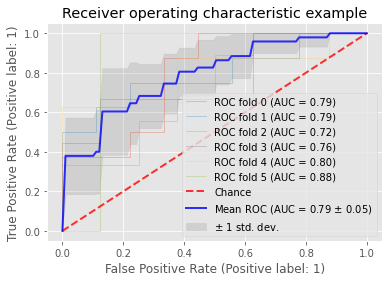

In [70]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier = svm.SVC(kernel="linear", probability=True, random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

In [1]:
from sklearn.impute import KNNImputer
import numpy as np

X = [ [3, np.NaN], [1, 2], [5, 10], [3, 6], [4, 8] ]
X_train = [[1, 2], [16, np.NaN], [25, 50], [50, 100], [3, 6] ]
print("X: ", X)
print("===========")


imputer = KNNImputer(n_neighbors= 1)
impute_with_1 = imputer.fit_transform(X)

print("\nImpute with 1 Neighbour: \n", impute_with_1)



imputer = KNNImputer(n_neighbors= 2)
impute_with_2 = imputer.fit_transform(X)

print("\n Impute with 2 Neighbours: \n", impute_with_1)

X:  [[3, nan], [1, 2], [5, 10], [3, 6], [4, 8]]

Impute with 1 Neighbour: 
 [[ 3.  6.]
 [ 1.  2.]
 [ 5. 10.]
 [ 3.  6.]
 [ 4.  8.]]

 Impute with 2 Neighbours: 
 [[ 3.  6.]
 [ 1.  2.]
 [ 5. 10.]
 [ 3.  6.]
 [ 4.  8.]]


In [2]:
imputer = KNNImputer(n_neighbors= 2)
imputer.fit(X)
impute_omd = imputer.transform(X_train)
print(X_train)
print(impute_omd)

[[1, 2], [16, nan], [25, 50], [50, 100], [3, 6]]
[[  1.   2.]
 [ 16.   9.]
 [ 25.  50.]
 [ 50. 100.]
 [  3.   6.]]


In [5]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

impute_estimator = ExtraTreesRegressor(n_estimators=10, random_state=0)
# impute_estimator = RandomForestRegressor(n_estimators=10, random_state=0)
imp_mean = IterativeImputer(random_state=0, estimator=impute_estimator)
imp_mean.fit(X)
impute_omd = imp_mean.transform(X_train)
print(impute_omd)

[[  1.   2.]
 [ 16.  10.]
 [ 25.  50.]
 [ 50. 100.]
 [  3.   6.]]


In [37]:
from sklearn.preprocessing import OneHotEncoder

### Correct
train = pd.DataFrame(['A', 'B', 'A', 'C'])
test = pd.DataFrame(['B', 'A', 'D'])

enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(train)

enc.transform(train).toarray()
#array([[1., 0., 0.],
#       [0., 1., 0.],
#       [1., 0., 0.],
#       [0., 0., 1.]])

enc.transform(test).toarray()
#array([[0., 1., 0.],
#       [1., 0., 0.],
#       [0., 0., 0.]])

### Incorrect
full = pd.concat((train, test))

enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(full)

enc.transform(train).toarray()
#array([[1., 0., 0., 0.],
#       [0., 1., 0., 0.],
#       [1., 0., 0., 0.],
#       [0., 0., 1., 0.]])

enc.transform(test).toarray()
#array([[0., 1., 0., 0.],
#       [1., 0., 0., 0.],
#       [0., 0., 0., 1.]])

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 0.]])

In [38]:
train

,0
0,A
1,B
2,A
3,C


In [39]:
enc.transform(train).toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [40]:
test

,0
0,B
1,A
2,D


In [41]:
enc.transform(test).toarray()

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 0.]])